<a href="https://colab.research.google.com/github/tableClothed/ML-Projects/blob/master/MovieRecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, ' "Best movies by TMDB Votes ')

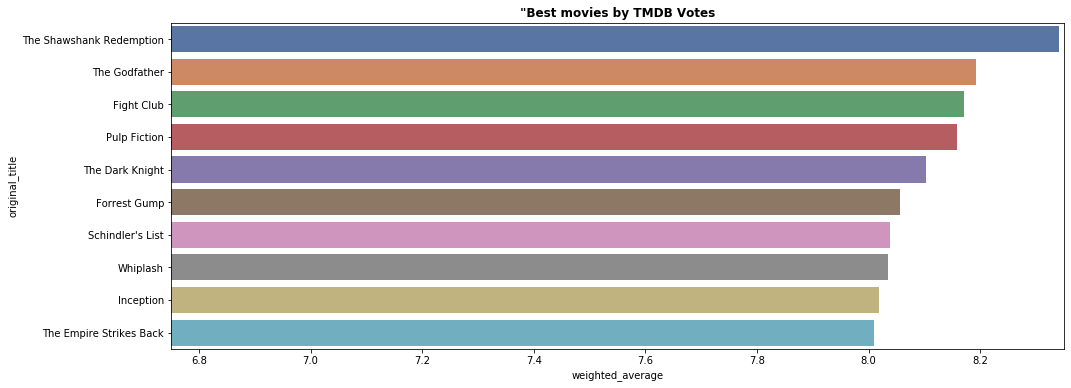

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


# uploaded = files.upload()

credits = pd.read_csv("tmdb_5000_credits.csv")
movies_incomplete = pd.read_csv("tmdb_5000_movies.csv")

# print("credits: ", credits.shape)
# print("movies_incomplete", movies_incomplete.shape)

credits_renamed = credits.rename(index=str, columns={"movie_id": "id"})
movies_dirty = movies_incomplete.merge(credits_renamed, on='id')
movies_dirty.head()

movies_clean = movies_dirty.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
movies_clean.head()

V = movies_clean['vote_count'] # nr of votes for the movie
R = movies_clean['vote_average'] # for rating - averange for the movie as a number form 0 do 10
C = movies_clean['vote_average'].mean() # the mean vote across the whole report
m = movies_clean['vote_count'].quantile(0.70) # min. 70% votes

movies_clean['weighted_average'] = (V/ (V+m) * R) + (m/(m + V) * C) # weighted ranking

wavg = movies_ranked.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(16, 6))

ax = sns.barplot(x=wavg['weighted_average'].head(10), y=wavg['original_title'].head(10), data=wavg, palette='deep')

plt.xlim(6.75, 8.35)
plt.title(' "Best movies by TMDB Votes ', weight='bold')
